<a href="https://colab.research.google.com/github/shy222/DSCI498-Final-Project/blob/main/DSCI498_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing necessary libraries
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import tensorflow_datasets as tfds

from matplotlib import gridspec


Loaded the "RockPaperScissors" dataset from Tensorflow Datasets

In [2]:
ds = tfds.load('RockPaperScissors', split='train', as_supervised=True, shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteQISB6G/rock_paper_scissors-train.tfrec…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteQISB6G/rock_paper_scissors-test.tfreco…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


Shuffled the dataset to ensure randomness.

In [3]:
ds = ds.shuffle(1000).batch(128)

Each image has a shape of (300, 300, 3), indicating height, width, and
3 color channels (RGB).

The target variable (label) in each element of the dataset is represented as a tensor with a shape of (None,) and a data type of int64. This means that the target variable is a one-dimensional array (vector) with a variable batch size, where each element corresponds to a specific class or category.

In [4]:
ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

This label_dict dictionary maps the integer labels to their corresponding class names in the dataset.

In [5]:
# Create dictionary of target classes
label_dict = {
 0: 'Rock',
 1: 'Paper',
 2: 'Scissors'
}

Creates a visualization of a batch of images from the dataset along with their corresponding labels

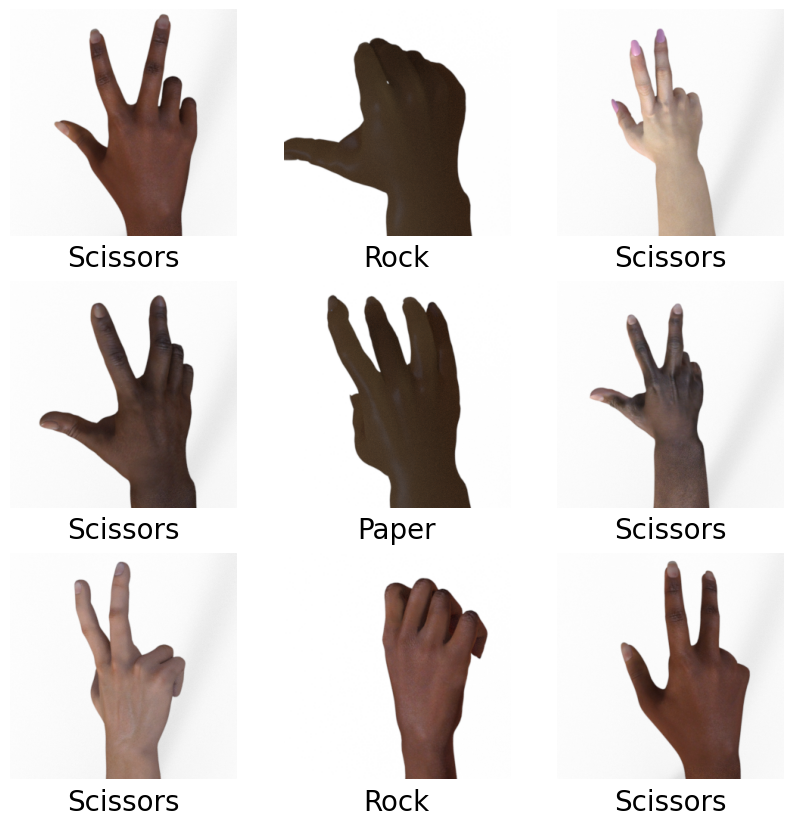

In [6]:
plt.figure(figsize=(10, 10))
for image, label in ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        lab = np.array(label[i])
        plt.text(0.5, -0.1, s = label_dict[int(lab)], horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes, fontsize=20)
        plt.imshow(image[i])
        plt.axis("off")

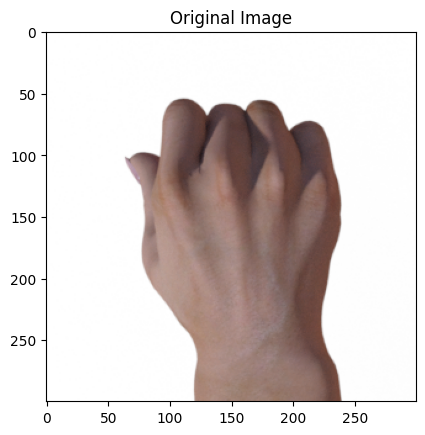

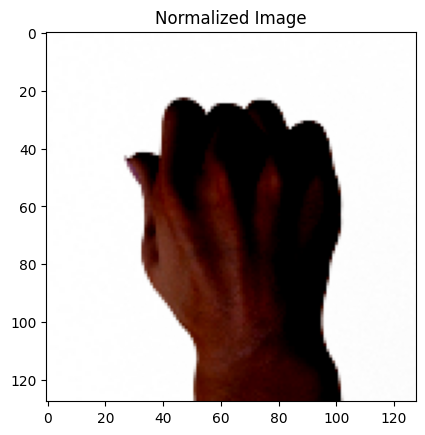

In [7]:

@tf.function
def normalization(tensor):
    tensor = tf.image.resize(tensor, (128,128))
    tensor = tf.subtract(tf.divide(tensor, 127.5), 1)
    return tensor



# Iterate over the dataset and retrieve the first image
for sample_image, _ in ds.take(1):
    # Display the original image
    plt.imshow(sample_image[0])
    plt.title('Original Image')
    plt.show()

    # Normalize the image
    normalized_image = normalization(sample_image)

    # Display the normalized image
    plt.imshow(normalized_image[0])
    plt.title('Normalized Image')
    plt.show()



In [8]:
for img, label in ds.take(1):
    img = tf.cast(img, tf.float32)
    imgs = normalization(img)
    print(imgs.shape)

(128, 128, 128, 3)


In [9]:
BATCH_SIZE=128
latent_dim = 100

In [10]:
# label input
con_label = layers.Input(shape=(1,))

# latent vector input
latent_vector = layers.Input(shape=(latent_dim,))

In [11]:
def label_conditioned_generator(n_classes=3, embedding_dim=100):
    # embedding for categorical input
    label_embedding = layers.Embedding(n_classes, embedding_dim)(con_label)
    # linear multiplication
    nodes = 4 * 4
    label_dense = layers.Dense(nodes)(label_embedding)
    # reshape to additional channel
    label_reshape_layer = layers.Reshape((4, 4, 1))(label_dense)
    return label_reshape_layer

def latent_input(latent_dim=100):
    # image generator input
    nodes = 512 * 4 * 4
    latent_dense = layers.Dense(nodes)(latent_vector)
    latent_dense = layers.ReLU()(latent_dense)
    latent_reshape = layers.Reshape((4, 4, 512))(latent_dense)
    return latent_reshape

In [12]:
from graphviz import Digraph

def plot_latent_vector_flow():
    dot = Digraph()

    # Add nodes
    dot.node('latent_vector', 'Latent Vector')
    dot.node('dense', 'Dense Layer')
    dot.node('relu', 'ReLU Activation')
    dot.node('reshape', 'Reshape Layer')

    # Add edges
    dot.edge('latent_vector', 'dense')
    dot.edge('dense', 'relu')
    dot.edge('relu', 'reshape')

    # Render and save the diagram
    dot.render('latent_vector_flow', format='png', cleanup=True)

# Plot the flow diagram for latent vector input
plot_latent_vector_flow()

In [13]:
from graphviz import Digraph

def plot_label_conditioned_flow():
    dot = Digraph()

    # Add nodes
    dot.node('conditioned_label', 'Conditioned Label')
    dot.node('embedding', 'Embedding Layer')
    dot.node('dense', 'Dense Layer')
    dot.node('reshape', 'Reshape Layer')

    # Add edges
    dot.edge('conditioned_label', 'embedding')
    dot.edge('embedding', 'dense')
    dot.edge('dense', 'reshape')

    # Render and save the diagram
    dot.render('label_conditioned_flow', format='png', cleanup=True)

# Plot the flow diagram for label conditioned input
plot_label_conditioned_flow()
